In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, cohen_kappa_score
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")


In [3]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [4]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [5]:
# Apply SMOTE to your dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [6]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [7]:
# Initialize and fit a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Make predictions on the training dataset
y_train_pred = clf.predict(X_train)

In [9]:
# Choose one label (e.g., 10) as the positive class
pos_label = 10

In [10]:
# Calculate Sensitivity, Specificity, ROC AUC, Accuracy, Precision, Recall, F1 Score, Kappa Statistics
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, pos_label=pos_label)
recall_train = recall_score(y_train, y_train_pred, pos_label=pos_label)
f1_train = f1_score(y_train, y_train_pred, pos_label=pos_label)
roc_auc_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
kappa_train = cohen_kappa_score(y_train, y_train_pred)

In [11]:
# Calculate the confusion matrix for the training dataset
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

Confusion Matrix (Actual vs. Predicted):
                  Predicted Positive  Predicted Negative
Actual Positive                3120                   6
Actual Negative                   0                3108


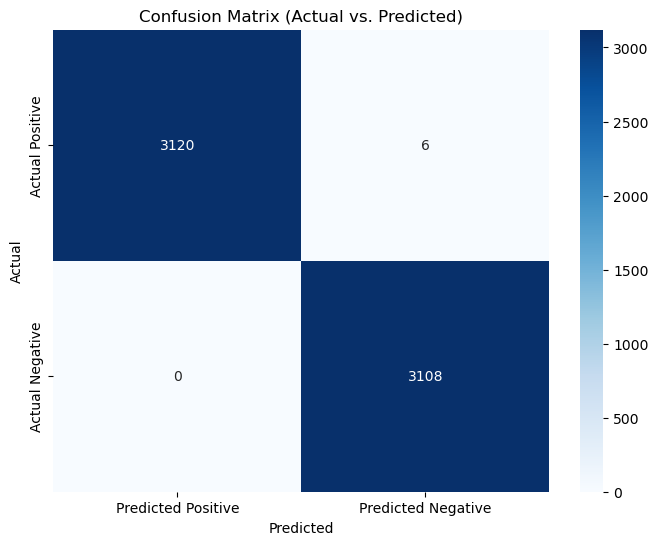

In [17]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Create a labeled confusion matrix
confusion_matrix_train = pd.DataFrame(conf_matrix, columns=[ "Predicted Positive","Predicted Negative"], index=["Actual Positive","Actual Negative"])

# Display the labeled confusion matrix
print("Confusion Matrix (Actual vs. Predicted):\n", confusion_matrix_train)

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Actual vs. Predicted)")

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Random Forest/confusion matrix train data.svg", format='svg')


plt.show()


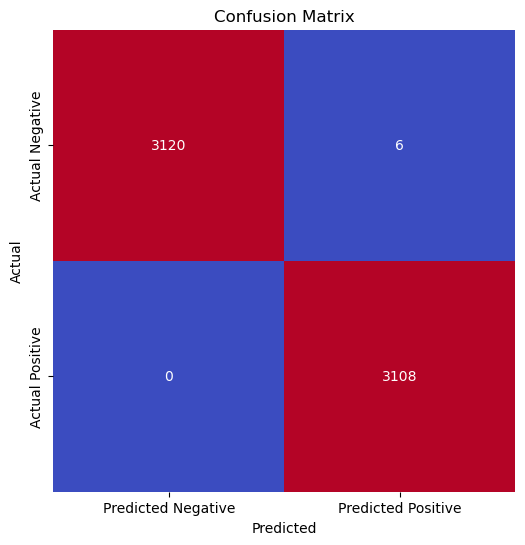

In [14]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_train, y_train_pred)

# Define custom colors for your heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create a heatmap with custom colors
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap=cmap, cbar=False, square=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Random Forest/confusion matrix train data 11.svg", format='svg')

plt.show()

In [12]:
# Generate the classification report for the training dataset
class_report_train = classification_report(y_train, y_train_pred)

In [13]:
# Print all the calculated metrics
print(f"Accuracy: {accuracy_train}")
print(f"Precision: {precision_train}")
print(f"Recall: {recall_train}")
print(f"F1 Score: {f1_train}")
print(f"ROC AUC: {roc_auc_train}")
print(f"Kappa Statistics: {kappa_train}")
print(f"Confusion Matrix:\n{conf_matrix_train}")
print(f"Classification Report:\n{class_report_train}")

Accuracy: 0.9990375360923965
Precision: 1.0
Recall: 0.9980806142034548
F1 Score: 0.9990393852065321
ROC AUC: 0.9999528078942667
Kappa Statistics: 0.9980750668353839
Confusion Matrix:
[[3120    6]
 [   0 3108]]
Classification Report:
              precision    recall  f1-score   support

          10       1.00      1.00      1.00      3126
          20       1.00      1.00      1.00      3108

    accuracy                           1.00      6234
   macro avg       1.00      1.00      1.00      6234
weighted avg       1.00      1.00      1.00      6234



In [14]:
# Calculate ROC curve for the training dataset
fpr_train, tpr_train, _ = roc_curve(np.where(y_train == pos_label, 1, 0), clf.predict_proba(X_train)[:, 1])

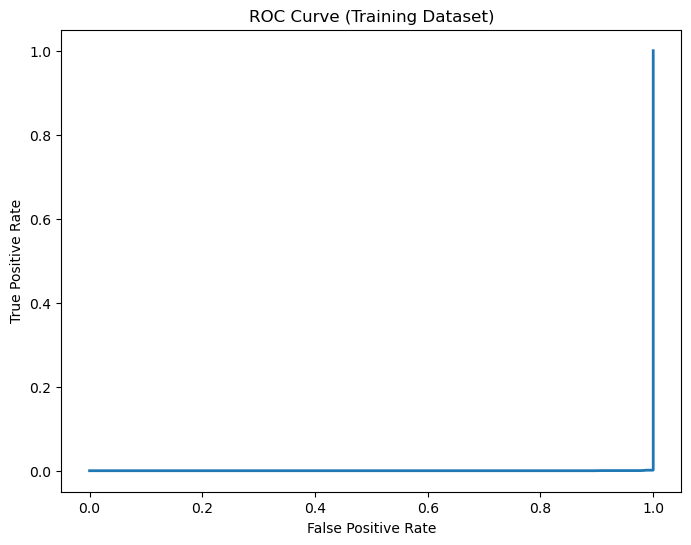

In [15]:
# Plot ROC curve for the training dataset
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Dataset)')
plt.show()

In [16]:
# Calculate sensitivity (True Positive Rate)
sensitivity_train = recall_train  # Same as recall

# Calculate specificity (True Negative Rate)
tn, fp, fn, tp = conf_matrix_train.ravel()
specificity_train = tn / (tn + fp)

print("Sensitivity (True Positive Rate):", sensitivity_train)
print("Specificity (True Negative Rate):", specificity_train)

Sensitivity (True Positive Rate): 0.9980806142034548
Specificity (True Negative Rate): 0.9980806142034548


#Compare-test and training model

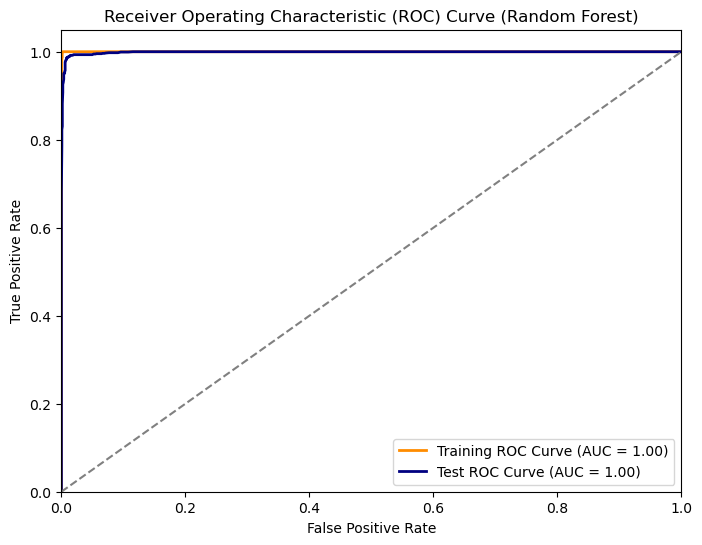

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Map your labels to binary (0 and 1) on the training data
y_train_binary = y_train.copy()
y_train_binary[y_train_binary == 10] = 0  # Map 10 to 0
y_train_binary[y_train_binary == 20] = 1  # Map 20 to 1

# Calculate ROC curve for the training dataset
y_pred_train_prob_rf = clf.predict_proba(X_train)[:, 1]
fpr_train_rf, tpr_train_rf, _ = roc_curve(y_train_binary, y_pred_train_prob_rf)
roc_auc_train_rf = roc_auc_score(y_train_binary, y_pred_train_prob_rf)

# Map your labels to binary (0 and 1) on the test data
y_test_binary_rf = y_test.copy()
y_test_binary_rf[y_test_binary_rf == 10] = 0  # Map 10 to 0
y_test_binary_rf[y_test_binary_rf == 20] = 1  # Map 20 to 1

# Calculate ROC curve for the test dataset
y_pred_test_prob_rf = clf.predict_proba(X_test)[:, 1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test_binary_rf, y_pred_test_prob_rf)
roc_auc_test_rf = roc_auc_score(y_test_binary_rf, y_pred_test_prob_rf)

# Plot ROC curves for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_train_rf, tpr_train_rf, color='darkorange', lw=2, label=f'Training ROC Curve (AUC = {roc_auc_train_rf:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='navy', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()